In [146]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import AdaBoostRegressor, AdaBoostClassifier, \
    GradientBoostingClassifier, GradientBoostingRegressor, \
    RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.vq import whiten
from sklearn.decomposition import PCA


from tqdm.notebook import tqdm
tqdm().pandas()

xrd_data_path = './nano281-final-lab-2020-data/cod_xrd_42k.csv'
test_data_path = './nano281-final-lab-2020-data/test.csv'
data_path = './nano281-final-lab-2020-data/'

/home/robert/miniconda3/envs/nano281/lib/python3.7/site-packages/tqdm/std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [2]:
raw_data = pd.read_csv(xrd_data_path)

In [129]:
cols = list(raw_data.columns)
cols.remove('formula')
cols.remove('spacegroup_number')
cols.remove('cod_id')
cols.remove('bravais_lattice')

In [133]:
ultimate_X = raw_data[cols]
ultimate_y = raw_data['bravais_lattice']
ultimate_X_train, ultimate_X_test, ultimate_y_train, ultimate_y_test = train_test_split(ultimate_X, ultimate_y, test_size = 0.2)

In [3]:
test_subset = raw_data.sample(n=10000)

In [121]:
validation_index = []
for i in raw_data.index:
    if i not in test_subset.index:
        validation_index.append(i)

In [123]:
validate_df = raw_data.iloc[validation_index]

In [4]:
test_subset.tail(20)

,formula,spacegroup_number,cod_id,bravais_lattice,y0,y1,y2,y3,y4,y5,...,y170,y171,y172,y173,y174,y175,y176,y177,y178,y179
10624,Si0.98Ni3B0.02,221,1511102,cP,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.301270e-44,2.397446e-31,3.180978e-20,8.147642e-12,4.028679e-06,3.845501e-03,7.086025e-03,2.520646e-05,1.730935e-10,2.294610e-18
10425,NdZn,221,1538168,cP,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.235645e-20,3.169404e-32,5.065578e-29,2.518243e-18,2.416717e-10,4.477272e-05,1.601256e-02,1.105522e-02,1.473443e-05,3.791046e-11
2772,FeH20(C9O2)2,2,4066523,aP,0.000000e+00,7.930914e-286,7.025289e-248,1.201336e-212,3.965743e-180,2.527226e-150,...,2.060587e-02,1.641770e-02,8.357706e-03,1.520083e-02,1.488578e-02,1.323190e-02,1.263375e-02,1.908337e-02,2.013703e-02,6.377100e-03
41687,TeH56C60(S2N)4,114,7005224,tP,1.507842e-315,1.468416e-275,2.760589e-238,1.001876e-203,7.019168e-172,9.493290e-143,...,2.896964e-02,3.077673e-02,3.666988e-02,1.963671e-02,2.304757e-02,2.407871e-02,3.713063e-02,3.578465e-02,1.828800e-02,1.766267e-02
33383,H16PdC13N3Cl,20,7001602,oS,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.942046e-02,2.958161e-02,2.095739e-02,2.051838e-02,2.737899e-02,2.234412e-02,2.644790e-02,2.617064e-02,1.421761e-02,3.559264e-03
34673,Sr7Ca3.84Cu8Bi7.92O32.576,66,2310292,oS,1.044706e-149,1.096700e-122,2.222497e-98,8.694687e-77,6.566384e-58,9.573220e-42,...,3.700886e-03,4.733668e-02,8.666349e-02,6.432079e-03,4.856712e-02,2.116189e-02,1.355523e-02,1.406136e-02,1.219045e-01,3.625655e-03
12696,NaW6NCl18,176,1536447,hP,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.024254e-300,5.608731e-261,...,2.355515e-02,2.460259e-02,7.140739e-03,5.992062e-04,9.492034e-03,3.346752e-02,1.732389e-02,5.350227e-03,1.441553e-02,8.615856e-03
22494,Zn3H12C28(N3O2)4,4,4337323,mP,1.185544e-125,3.940334e-101,2.528178e-79,3.131424e-60,7.487478e-44,3.456119e-30,...,5.100993e-03,5.656568e-03,5.148574e-03,9.780983e-03,7.299562e-03,3.016028e-03,3.325290e-03,4.423124e-03,6.268441e-03,3.109948e-03
12124,ThMnCo4,191,1524947,hP,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.008518e-16,8.451086e-26,6.864499e-38,1.076378e-52,3.258217e-70,1.903947e-90,2.147777e-113,4.677167e-139,1.966238e-167,1.595692e-198
24217,H11C15N3O2,15,4514418,mS,0.000000e+00,0.000000e+00,4.589371e-299,2.137209e-260,1.921322e-224,3.334364e-191,...,2.282874e-02,3.221570e-02,1.835511e-02,2.658472e-02,1.704671e-02,2.296353e-02,1.520199e-02,2.105088e-02,3.045071e-02,8.748140e-03


In [5]:
raw_data.describe(include='all')

,formula,spacegroup_number,cod_id,bravais_lattice,y0,y1,y2,y3,y4,y5,...,y170,y171,y172,y173,y174,y175,y176,y177,y178,y179
count,41813,41814.000000,4.181400e+04,41814,4.181400e+04,4.181400e+04,4.181400e+04,4.181400e+04,4.181400e+04,4.181400e+04,...,41814.000000,41814.000000,41814.000000,41814.000000,41814.000000,41814.000000,41814.000000,41814.000000,41814.000000,41814.000000
unique,40063,NaN,NaN,14,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,SiO2,NaN,NaN,aP,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,52,NaN,NaN,4000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,101.038097,3.056883e+06,NaN,2.746731e-06,2.674169e-05,4.872614e-05,1.398656e-04,2.810849e-04,4.658790e-04,...,0.020727,0.020531,0.020214,0.020718,0.020617,0.020128,0.019886,0.019656,0.019648,0.009816
std,NaN,81.489412,1.971497e+06,NaN,5.610860e-04,4.909154e-03,5.774262e-03,1.072787e-02,1.541989e-02,1.798541e-02,...,0.029394,0.028476,0.027182,0.029024,0.029476,0.028133,0.029278,0.027882,0.028180,0.019622
min,NaN,1.000000,1.000026e+06,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,15.000000,1.530364e+06,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.002348,0.002432,0.002417,0.002507,0.002471,0.002420,0.002191,0.002172,0.002052,0.000053
50%,NaN,87.000000,2.106348e+06,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.632169e-290,...,0.012840,0.012889,0.012766,0.012850,0.012671,0.012543,0.012315,0.012062,0.011900,0.004330
75%,NaN,176.000000,4.304710e+06,NaN,8.920029e-286,6.742943e-248,1.098144e-212,3.128858e-180,1.932751e-150,2.447621e-123,...,0.027068,0.027073,0.026941,0.027145,0.026882,0.026328,0.025939,0.025748,0.025526,0.011676


In [7]:
#test_subset.loc[7116, 'bravais_lattice']

In [8]:
cf_graph_df = test_subset[test_subset.loc[:, 'bravais_lattice'] == 'cF']

In [9]:
cf_graph_df= cf_graph_df.drop(['formula', 'spacegroup_number', 'cod_id', 'bravais_lattice'], 
                              axis = 1).T

In [10]:
cf_graph_df

,5196,4427,5456,4350,5133,5480,4986,5877,6686,6960,...,5717,4139,7505,6233,6785,5046,4151,4958,7293,6526
y0,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
y1,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
y2,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
y3,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
y4,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
y175,2.277184e-02,0.000082,2.519001e-03,0.046231,4.006430e-03,1.337286e-02,8.973434e-04,1.769795e-08,3.294033e-02,1.928631e-03,...,5.027747e-03,6.223429e-03,0.009475,4.021865e-08,2.311609e-13,0.199346,3.554944e-02,1.412426e-48,6.179050e-09,0.000168
y176,2.771336e-04,0.031602,6.049085e-05,0.045382,4.428908e-07,7.474179e-02,9.814849e-02,1.599172e-05,5.685998e-04,1.464051e-08,...,6.062328e-07,3.523383e-06,0.000066,1.516595e-03,5.222096e-13,0.043217,2.039115e-05,1.129198e-65,3.340405e-04,0.011350
y177,6.510880e-09,0.073902,2.805858e-09,0.024257,9.451380e-14,8.064216e-04,2.072373e-02,2.789503e-05,1.894719e-08,2.145473e-16,...,8.464828e-05,3.850786e-12,0.008603,1.104005e-01,1.503824e-06,0.000296,2.257928e-11,1.742744e-85,3.486069e-02,0.002129
y178,2.952907e-16,0.029107,2.512472e-16,0.012770,3.893618e-23,1.679656e-08,8.447183e-06,9.393296e-08,1.218828e-15,6.069448e-27,...,5.035614e-02,8.124534e-21,0.002234,1.551430e-02,8.360046e-03,0.010790,4.826563e-20,5.192264e-108,7.023157e-03,0.026606


## Dimensionality Reduction with PCA

In [11]:
sexi_boi = PCA(int(len(cols)/18), whiten=True)

In [12]:
yucky_dat = np.array(test_subset[cols])

In [13]:
sexi_dat = sexi_boi.fit_transform(yucky_dat)

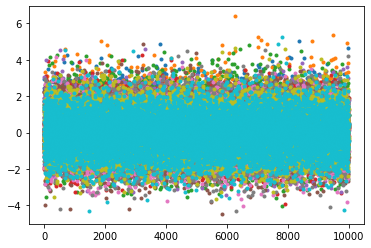

In [14]:
plt.plot(sexi_dat, '.')

In [15]:
sexi_df = pd.DataFrame(sexi_dat)
sexi_df.head(6)

,0,1,2,3,4,5,6,7,8,9
0,-0.738463,0.589802,-1.551657,0.021930,1.875480,-1.364703,0.383993,-0.845565,0.684109,0.201423
1,0.120244,-0.722336,0.258996,-0.429648,-1.089352,-0.806960,-0.260633,-0.468639,-0.386344,-0.852678
2,0.627194,-0.216366,-0.620935,-1.981831,-1.721094,-0.638284,-0.923038,0.478328,1.010469,1.752373
3,2.434591,-1.069360,1.586932,2.252454,3.025929,1.110946,0.431028,-0.150518,-0.684460,-0.009045
4,-0.693035,0.523403,1.223597,-0.329391,-0.268551,-1.899495,-0.834300,1.193434,0.043323,-1.370481
5,2.265893,-0.720537,0.480951,1.420253,0.878263,-0.128683,0.604276,0.878647,1.325844,1.402559


### Rejoin PCA data to dataframe

In [16]:
test_subset_copy = test_subset.copy(deep=True)
test_subset_copy['id'] = test_subset_copy.index
test_subset_copy = test_subset_copy.reset_index()

In [17]:
pac = lambda x: 'PCA' + str(x)
pca_cols = []
pca_df = test_subset_copy.join(sexi_df)
for i in pca_df.columns:
    if isinstance(i, int):
        pca_df = pca_df.rename({i: pac(i)}, axis=1)
        pca_cols.append(pac(i))

In [18]:
pca_df

,index,formula,spacegroup_number,cod_id,bravais_lattice,y0,y1,y2,y3,y4,...,PCA0,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9
0,27512,Ba4Tl6.4Au1.6,74,4331417,oI,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,-0.738463,0.589802,-1.551657,0.021930,1.875480,-1.364703,0.383993,-0.845565,0.684109,0.201423
1,20209,H21C16(NO)3,14,4505886,mP,0.000000e+00,0.000000e+00,0.000000e+00,1.244487e-299,9.413566e-261,...,0.120244,-0.722336,0.258996,-0.429648,-1.089352,-0.806960,-0.260633,-0.468639,-0.386344,-0.852678
2,24709,H11C12N2ClO8,15,2206554,mS,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.627194,-0.216366,-0.620935,-1.981831,-1.721094,-0.638284,-0.923038,0.478328,1.010469,1.752373
3,1463,HfAlH57C41N2O,2,4306830,aP,2.243845e-89,5.831811e-69,2.925995e-51,2.834022e-36,5.298979e-24,...,2.434591,-1.069360,1.586932,2.252454,3.025929,1.110946,0.431028,-0.150518,-0.684460,-0.009045
4,40882,Nd2Be2SiO7,113,2002625,tP,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,-0.693035,0.523403,1.223597,-0.329391,-0.268551,-1.899495,-0.834300,1.193434,0.043323,-1.370481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,8864,Ag2.856Au1.328S2,224,1509592,cP,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,-1.044634,0.521105,0.170442,1.671590,-2.290340,1.399121,-0.863291,-1.512424,0.612067,0.426093
9996,12724,Y(HO)3,176,4031388,hP,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,-0.448460,0.634572,-1.512058,-0.252665,1.804389,-0.906735,0.171626,-0.617944,-0.419117,-0.753927
9997,23036,H4C5S2Br2O,15,2018285,mS,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.575726,3.809764,-2.573440,-0.200332,0.462205,-2.637268,-1.476346,4.196119,0.725384,-0.042964
9998,1766,PH23AuC12ClO,2,4084064,aP,8.749944e-146,3.413547e-119,2.570786e-95,3.737538e-74,1.048974e-55,...,0.969737,-0.175416,0.942576,1.890550,1.808441,0.406734,-1.011477,-0.390375,-0.317929,0.486633


### Try out decision tree

In [68]:
X = pca_df[pca_cols]
y = pca_df['bravais_lattice']

In [69]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [70]:
decision_tree = DecisionTreeClassifier(criterion='entropy', random_state = 42, max_depth =8)

In [91]:
decision_tree.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [72]:
y_pred = decision_tree.predict(x_train)

In [73]:
decision_tree.score(x_train, y_train)

0.349125

In [74]:
decision_tree.score(x_test, y_test)

0.243

In [78]:
model = AdaBoostClassifier(decision_tree, n_estimators=100)
model.fit(x_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='entropy',
                                                         max_depth=8,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                       

In [79]:
model.score(x_train, y_train)

0.5225

In [80]:
model.score(x_test, y_test)

0.2155

### yikes, this is a terrible result. At least it's better than last place though

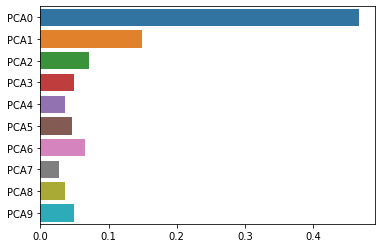

In [26]:
sns.barplot(decision_tree.feature_importances_, list(X.columns), orient='h')


In [27]:
def plot_grid_search_results(gs, ylim=None):
    """
    Plots the results of GridSearchCV.
    
    Args:
        gs: A GridSearchCV object.
        ylim: Optional setting for y limits.
    """
    results = pd.DataFrame(gs.cv_results_)
    for c in results.columns:
        # Note that here we are working with just variations in one parameter.
        # So we can automatically find the name of that parameter.
        if c.startswith("param_"):
            x = c
            break
    fig, ax = plt.subplots(figsize=(16, 8))    
    ax = sns.lineplot(x=x, y="mean_train_score", data=results)
    ax = sns.scatterplot(x=x, y="mean_train_score", data=results, marker='x')
    ax = sns.lineplot(x=x, y="mean_test_score", data=results)
    ax = sns.scatterplot(x=x, y="mean_test_score", data=results, marker='o')
    plt.xlabel(x)
    if ylim:
        plt.ylim(ylim)
    ax.legend(["Train", "Test"], loc=2);

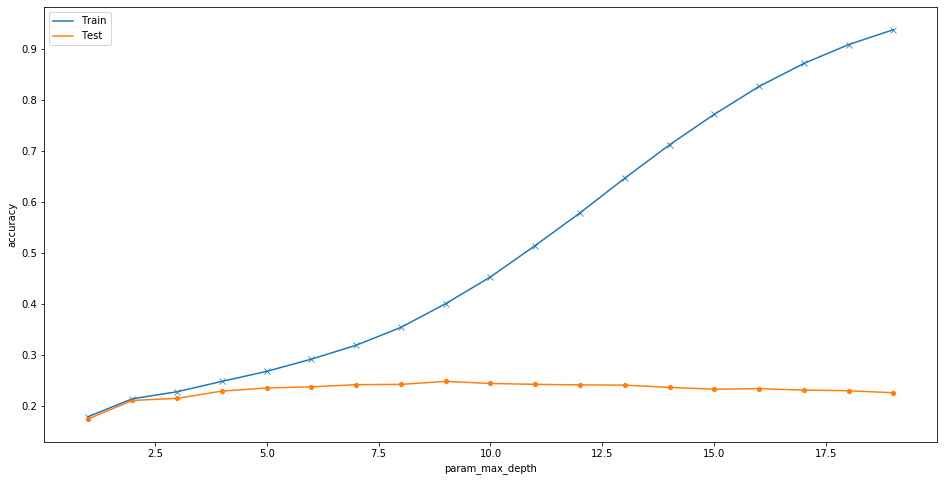

In [28]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
gs = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid={"max_depth": list(range(1, 20))},
    return_train_score=True,
    scoring="accuracy",
    cv=kfold
)
gs.fit(X, y)
plot_grid_search_results(gs)
plt.ylabel("accuracy");

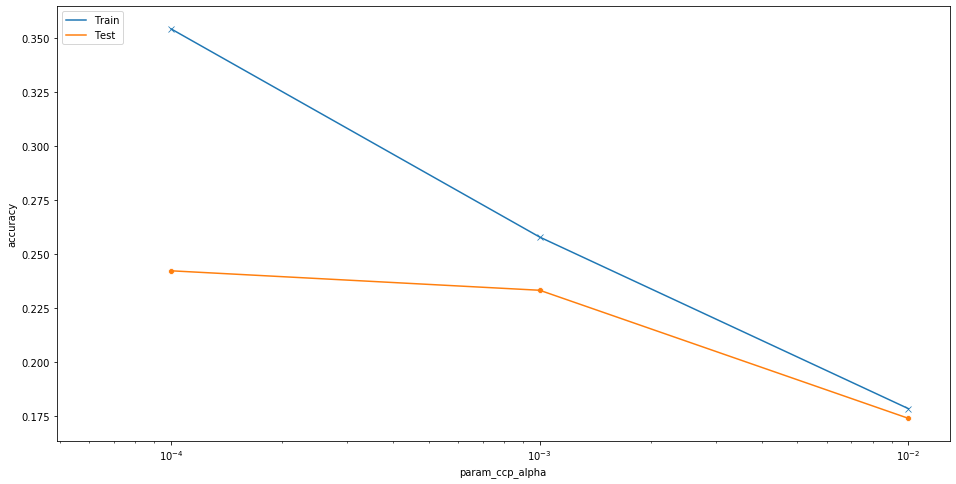

In [29]:
decision_tree = DecisionTreeClassifier(random_state=42, max_depth=8)
gs = GridSearchCV(
    decision_tree,
    param_grid={"ccp_alpha": [1e-4, 1e-3, 1e-2]},
    return_train_score=True,
    scoring="accuracy",
    cv=kfold
)
gs.fit(X, y)
plot_grid_search_results(gs)
plt.ylabel("accuracy")
plt.xscale('log');


# Try Decision Tree without dimensionality reduction

In [98]:
X = test_subset[cols]
y = test_subset['bravais_lattice']

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [100]:
tree = DecisionTreeClassifier(criterion='entropy', random_state = 42, max_depth = 10, ccp_alpha = 1e-3)
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.001, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [101]:
tree.score(X_train, y_train)

0.582375

In [102]:
tree.score(X_test, y_test)

0.3305

In [103]:
gs = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid={"max_depth": list(range(1, 15))},
    return_train_score=True,
    scoring="accuracy",
    cv=kfold
)
gs.fit(X, y)
plot_grid_search_results(gs)
plt.ylabel("accuracy");

KeyboardInterrupt: 

depth of 10 appears to give best accuracy for non-pca

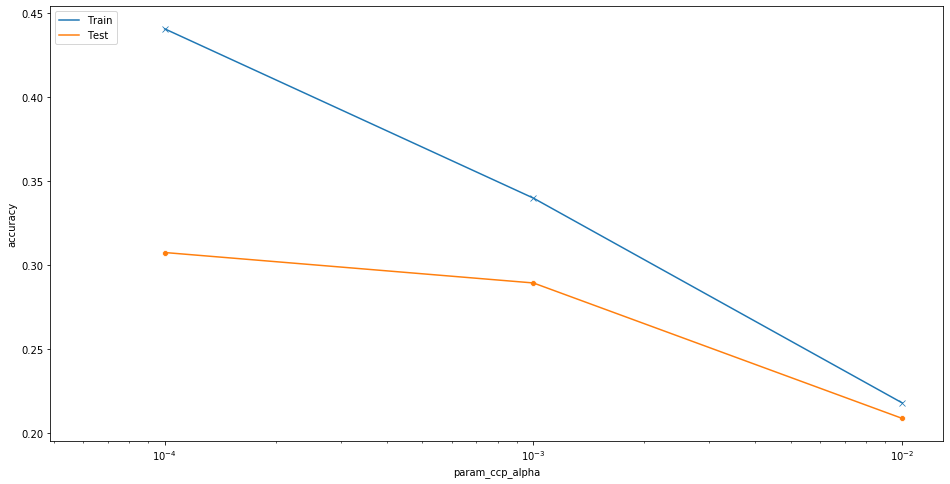

In [42]:
decision_tree = DecisionTreeClassifier(random_state=42, max_depth=8)
gs = GridSearchCV(
    decision_tree,
    param_grid={"ccp_alpha": [1e-4, 1e-3, 1e-2]},
    return_train_score=True,
    scoring="accuracy",
    cv=kfold
)
gs.fit(X, y)
plot_grid_search_results(gs)
plt.ylabel("accuracy")
plt.xscale('log');

### Try boosted learning models

In [61]:
model = AdaBoostClassifier(tree)

gs = GridSearchCV(
    model,
    param_grid={"n_estimators": range(10,100,20)},
    return_train_score = True,
    scoring="accuracy"
)
gs.fit(X, y)
plot_grid_search_results(gs)
plt.ylabel("accuracy");

KeyboardInterrupt: 

**Random Forest**

In [127]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [106]:
model.score(X_test, y_test)

0.4375

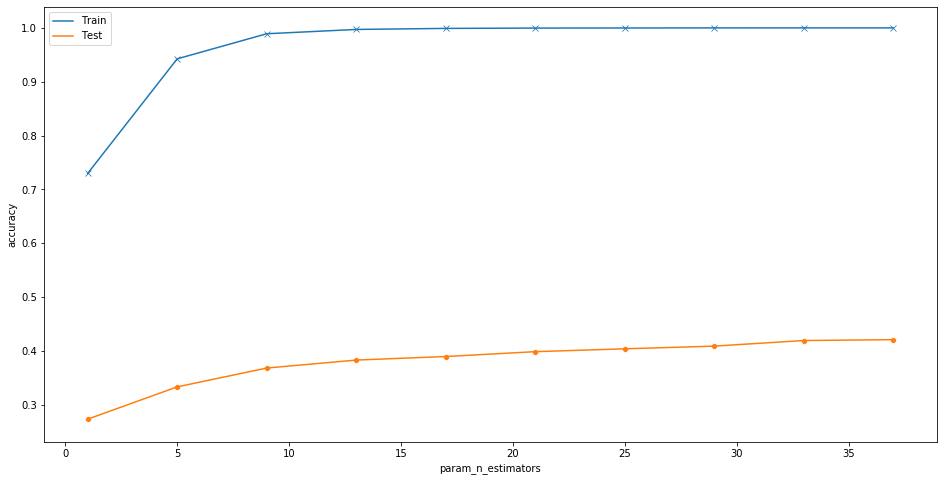

In [107]:
gs_model = RandomForestClassifier(random_state=0)

gs = GridSearchCV(
    gs_model,
    param_grid={"n_estimators": range(1, 40, 4)},
    return_train_score=True,
    scoring="accuracy",
    cv=kfold,
    n_jobs=4
)
gs.fit(X, y)
plot_grid_search_results(gs)
plt.ylabel("accuracy");

In [125]:
X_valid = validate_df[cols]
y_valid = validate_df['bravais_lattice']

In [128]:
model.score(X_valid, y_valid)

0.4421009618406991

In [134]:
model.fit(ultimate_X_train, ultimate_y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [135]:
model.score(ultimate_X_test, ultimate_y_test)

0.5383235680975726

In [143]:
final_test_df = pd.read_csv(test_data_path)
final_test_df['predicted_bravais'] = model.predict(final_test_df[cols])
final_test_df.head()

,id,y0,y1,y2,y3,y4,y5,y6,y7,y8,...,y171,y172,y173,y174,y175,y176,y177,y178,y179,predicted_bravais
0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.126624e-296,1.470671e-257,1.011802e-221,1.343801e-188,...,5.034175e-02,2.169112e-02,7.874344e-03,7.802616e-02,0.042481,0.014938,0.039612,0.022147,1.681035e-02,mS
1,1,8.494274e-193,7.309795e-162,1.214349e-133,3.894409e-108,2.411010e-85,2.881482e-65,6.648020e-48,2.960931e-33,2.545796e-21,...,9.658928e-03,1.518444e-02,9.287093e-03,5.173824e-03,0.002088,0.011913,0.005428,0.009213,4.776667e-03,oP
2,2,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.236315e-41,2.761469e-28,1.190723e-17,9.911529e-10,0.000159,0.049406,0.029586,0.000034,7.632784e-11,cF
3,3,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.121434e-03,4.606235e-02,2.547866e-03,8.068338e-04,0.001293,0.000252,0.000529,0.000002,1.733872e-11,hP
4,4,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,5.740605e-49,3.140308e-34,3.316242e-22,6.760513e-13,0.000003,0.020213,0.296440,0.008393,4.587113e-07,cF


In [148]:
final_test_df.to_csv((data_path + 'random_forest_1_rramji.csv'))